In [ ]:
import json

In [ ]:
def read_json(path):
    with open(path, 'r', encoding="utf-8") as f:
        data = json.load(f)
    return data

def write_json(data, path):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

In [ ]:
!unzip t5_lgs_tacred.zip

In [ ]:
import json
from datetime import timedelta

# Sample log data
log_data = open("logs_15.txt","r").read()
log_data_5 = open("logs_5.txt","r").read()
log_data_10 = open("logs_10.txt","r").read()

import re



# Regex patterns
base_train_pattern = r"Base Train\. Experiment Id: (\d+)\. Task Id: (task\d+)\. Duration: ([\d:.]+)"
memory_train_pattern = r"Memory Train\. Experiment Id: (\d+)\. Task Id: (task\d+)\. Duration: ([\d:.]+)"

# Extract Base Train data
base_train_matches = re.findall(base_train_pattern, log_data)
print("Base Train Matches:", base_train_matches)

# Extract Memory Train data
memory_train_matches_15 = re.findall(memory_train_pattern, log_data)
print("Memory Train Matches:", memory_train_matches_15)
memory_train_matches_5 = re.findall(memory_train_pattern, log_data_5)
memory_train_matches_10 = re.findall(memory_train_pattern, log_data_10)

Base Train Matches: [('1', 'task1', '0:05:31.231212'), ('1', 'task2', '0:03:50.970378'), ('1', 'task3', '0:04:53.797069'), ('1', 'task4', '0:06:00.542421'), ('1', 'task5', '0:04:31.001254'), ('1', 'task6', '0:04:36.270521'), ('1', 'task7', '0:04:26.476347'), ('1', 'task8', '0:03:47.047379'), ('1', 'task9', '0:04:04.551157'), ('1', 'task10', '0:04:42.705913'), ('2', 'task1', '0:04:11.332029'), ('2', 'task2', '0:03:17.727297'), ('2', 'task3', '0:05:12.548153'), ('2', 'task4', '0:05:15.255118'), ('2', 'task5', '0:04:01.457265'), ('2', 'task6', '0:04:11.420320'), ('2', 'task7', '0:03:56.868849'), ('2', 'task8', '0:04:03.285176'), ('2', 'task9', '0:05:37.215742'), ('2', 'task10', '0:06:31.240746'), ('3', 'task1', '0:05:11.836081'), ('3', 'task2', '0:04:27.398320'), ('3', 'task3', '0:06:29.220042'), ('3', 'task4', '0:05:58.074550'), ('3', 'task5', '0:04:00.044059'), ('3', 'task6', '0:04:08.321061'), ('3', 'task7', '0:05:07.380550'), ('3', 'task8', '0:02:21.468599'), ('3', 'task9', '0:05:04.4

In [ ]:
memory_train_matches_5

In [ ]:
memory_train_matches_10

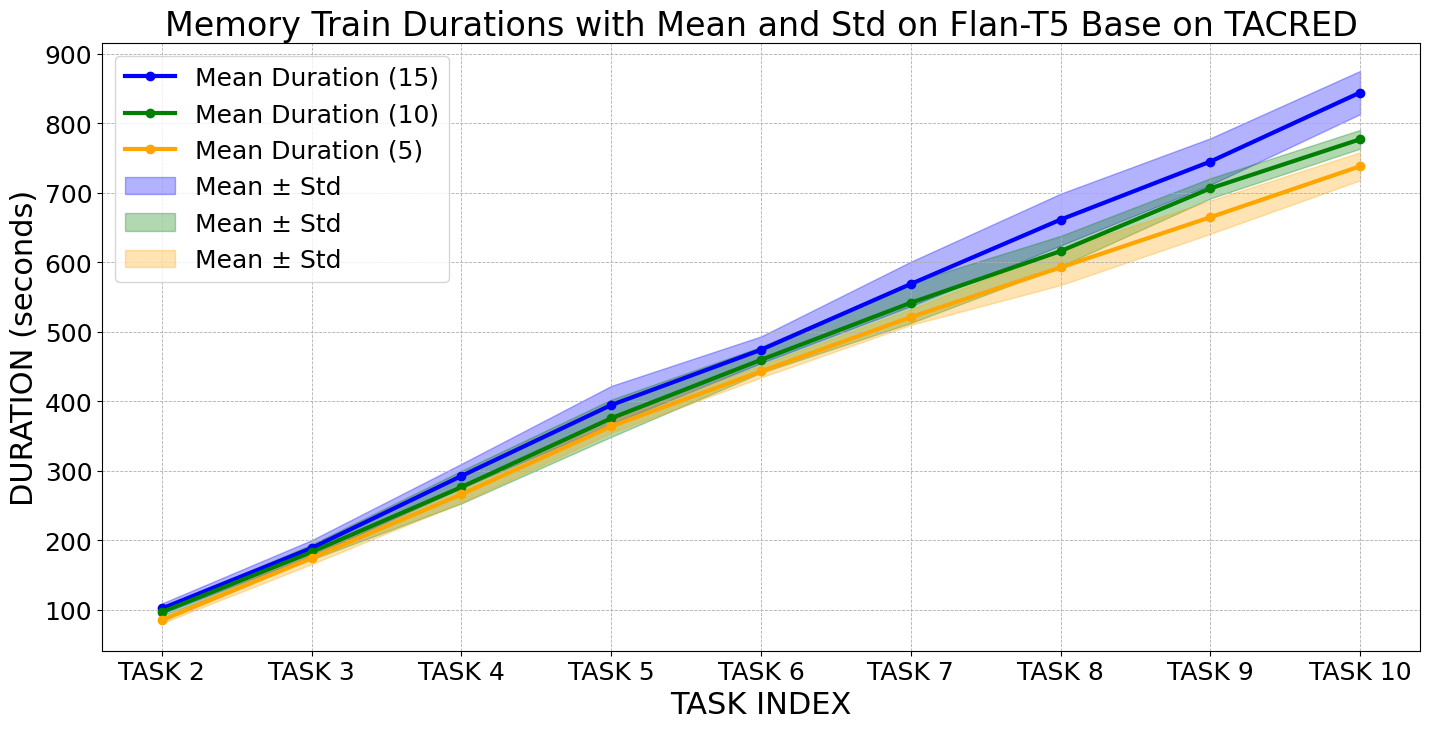

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({"font.size": 30})
# Data provided by the user


# Function to convert duration to seconds
def time_to_seconds(duration):
    t = timedelta(
        hours=int(duration.split(":")[0]),
        minutes=int(duration.split(":")[1]),
        seconds=float(duration.split(":")[2]),
    )
    return t.total_seconds()

# Process data for analysis
tasks_data = {}
for exp_id, task_id, duration in memory_train_matches_15:
    duration_sec = time_to_seconds(duration)
    if task_id not in tasks_data:
        tasks_data[task_id] = []
    tasks_data[task_id].append(duration_sec)

# Sort tasks explicitly to ensure the order ends with task10
sorted_task_labels = sorted(tasks_data.keys(), key=lambda x: int(x.replace("task", "")))
means = [np.mean(tasks_data[task]) for task in sorted_task_labels]
stds = [np.std(tasks_data[task]) for task in sorted_task_labels]
###10
tasks_data_10 = {}
for exp_id, task_id, duration in memory_train_matches_10:
    duration_sec = time_to_seconds(duration)
    if task_id not in tasks_data_10:
        tasks_data_10[task_id] = []
    tasks_data_10[task_id].append(duration_sec)

# Sort tasks explicitly to ensure the order ends with task10
means_10 = [np.mean(tasks_data_10[task]) for task in sorted_task_labels]
stds_10 = [np.std(tasks_data_10[task]) for task in sorted_task_labels]
###15
tasks_data_5 = {}
for exp_id, task_id, duration in memory_train_matches_5:
    duration_sec = time_to_seconds(duration)
    if task_id not in tasks_data_5:
        tasks_data_5[task_id] = []
    tasks_data_5[task_id].append(duration_sec)

# Sort tasks explicitly to ensure the order ends with task10
means_5 = [np.mean(tasks_data_5[task]) for task in sorted_task_labels]
stds_5 = [np.std(tasks_data_5[task]) for task in sorted_task_labels]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
sorted_task_labels = ["TASK 2", "TASK 3", "TASK 4", "TASK 5", "TASK 6", "TASK 7", "TASK 8", "TASK 9", "TASK 10"]
# Line plot for the mean
ax.plot(sorted_task_labels, means, label='Mean Duration (15)', color='blue', marker='o', linewidth=3)
ax.plot(sorted_task_labels, means_10, label='Mean Duration (10)', color='green', marker='o', linewidth=3)
ax.plot(sorted_task_labels, means_5, label='Mean Duration (5)', color='orange', marker='o', linewidth=3)
# Shaded region for standard deviation
ax.fill_between(sorted_task_labels,
                [m - s for m, s in zip(means, stds)],
                [m + s for m, s in zip(means, stds)],
                color='blue', alpha=0.3, label='Mean ± Std')
ax.fill_between(sorted_task_labels,
                [m - s for m, s in zip(means_10, stds_10)],
                [m + s for m, s in zip(means_10, stds_10)],
                color='green', alpha=0.3, label='Mean ± Std')
ax.fill_between(sorted_task_labels,
                [m - s for m, s in zip(means_5, stds_5)],
                [m + s for m, s in zip(means_5, stds_5)],
                color='orange', alpha=0.3, label='Mean ± Std')

# Formatting the plot

plt.title('Memory Train Durations with Mean and Std on Flan-T5 Base on TACRED', fontsize=24)
plt.xlabel('TASK INDEX', fontsize=22)
plt.ylabel('DURATION (seconds)', fontsize=22)
plt.tick_params(axis='both', labelsize=22)
plt.legend(fontsize=22)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.6)

plt.legend(fontsize=18)

# Adjust tick parameters
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('memory_time_cost_t5_tacred_memory_train_plot.jpeg', dpi=500, bbox_inches='tight')
plt.show()
